In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly

import plotly.graph_objects as go

# Let's try clustering

In [2]:
customers_pca = pd.read_csv('../data/customers_pca.csv', index_col=0)
customers_pca

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,Seattle,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita
0,0.181399,0.434211,0.555556,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.045818,0.763158,0.111111,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.128665,0.328947,0.888889,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.330667,0.539474,0.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.309066,0.605263,1.000000,0.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,0.183043,0.565789,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0.425231,0.486842,0.000000,0.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0.104747,0.315789,0.777778,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# k means first

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()


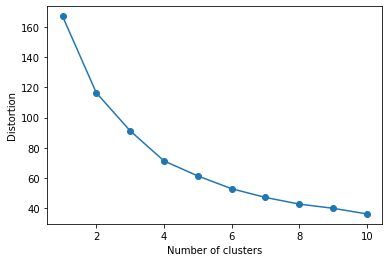

In [4]:
plot_distortion(customers_pca.iloc[:,:4], max_clusters = 10)

In [5]:
# set up k_means params
km = KMeans(n_clusters=4,
            n_init=10,
            random_state=0)

In [30]:
# fit and predict
y_km = km.fit_predict(customers_pca.iloc[:,:4])
y_km

array([3, 1, 3, 1, 3, 2, 0, 3, 2, 3, 3, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 1,
       3, 3, 2, 1, 0, 3, 3, 1, 1, 1, 2, 3, 1, 2, 0, 1, 3, 0, 0, 2, 1, 2,
       1, 1, 1, 0, 3, 1, 0, 0, 3, 3, 3, 1, 1, 3, 1, 3, 2, 0, 0, 1, 3, 0,
       3, 2, 0, 0, 1, 2, 3, 1, 3, 3, 0, 1, 0, 3, 1, 3, 1, 0, 3, 2, 1, 1,
       1, 3, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3,
       0, 3, 3, 1, 2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 0, 3, 0, 1, 2, 0, 3, 1,
       0, 1, 3, 0, 3, 3, 0, 1, 3, 3, 3, 0, 3, 0, 3, 3, 1, 2, 0, 1, 1, 1,
       1, 3, 0, 3, 2, 3, 3, 3, 3, 2, 2, 2, 1, 0, 1, 3, 1, 3, 3, 1, 0, 0,
       3, 3, 3, 1, 3, 0, 3, 0, 3, 1, 1, 2, 3, 2, 1, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 3, 3, 0, 0, 1, 3, 0, 1, 0, 3, 0, 0, 3, 3, 0, 2, 0, 2, 1, 2,
       3, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 2, 0,
       1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 1, 2, 3, 2, 2,
       0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 3, 2, 1, 1, 1, 0, 0, 3, 3, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 1, 3, 0, 1, 3, 0, 0, 0,

In [31]:
customers_pca['cluster'] = y_km
customers_pca

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita,cluster
0,0.181399,0.434211,0.555556,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0.045818,0.763158,0.111111,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.128665,0.328947,0.888889,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0.330667,0.539474,0.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.309066,0.605263,1.000000,0.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
743,0.183043,0.565789,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
744,0.425231,0.486842,0.000000,0.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
745,0.104747,0.315789,0.777778,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [32]:
customers_radar = customers_pca.groupby('cluster').mean()
customers_radar

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,Seattle,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.047311,0.086466,0.365079,0.019704,0.009852,0.009852,0.004926,0.000000,0.014778,0.009852,...,0.000000,0.009852,0.009852,0.004926,0.014778,0.004926,0.009852,0.000000,0.004926,0.009852
1,0.185363,0.565649,0.208038,0.042553,0.005319,0.010638,0.000000,0.000000,0.005319,0.015957,...,0.021277,0.010638,0.005319,0.005319,0.010638,0.010638,0.000000,0.000000,0.010638,0.000000
2,0.221601,0.332420,0.325617,0.509722,0.013889,0.027778,0.000000,0.013889,0.034722,0.013889,...,0.013889,0.006944,0.013889,0.000000,0.006944,0.000000,0.020833,0.000000,0.000000,0.006944
3,0.195338,0.556542,0.774633,0.100943,0.009434,0.009434,0.000000,0.000000,0.009434,0.004717,...,0.014151,0.009434,0.009434,0.000000,0.004717,0.018868,0.018868,0.004717,0.014151,0.000000


In [33]:
def plotRadarChart(data):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i,:4].values,
                                        theta=data.columns[:4],
                                        name=str(data.index[i]),
                                        fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

In [34]:
plotRadarChart(customers_radar)